<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/2023_06-19e23_Modelagem_Hidrol%C3%B3gica_1_Observando_dados_2023_06_19e23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização dos dados hidrológicos


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!gdown 1Tv-ZfIos7cUmidMkItQi-W6PSQPwN9zT

Downloading...
From: https://drive.google.com/uc?id=1Tv-ZfIos7cUmidMkItQi-W6PSQPwN9zT
To: /content/dados_cambara_2004-2008.csv
100% 80.2k/80.2k [00:00<00:00, 4.20MB/s]


In [3]:
df = pd.read_csv('dados_cambara_2004-2008.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,prec(mm/dia),etp(mm/dia),et(mm/dia),q(m3/s)
data,,,,
2004-01-01,0.0000,3.954348,2.996060,0.76
2004-01-02,0.0000,3.954348,2.996060,0.54
2004-01-03,0.0000,3.954348,2.996060,0.51
2004-01-04,0.0000,3.954348,2.996060,0.48
2004-01-05,0.0000,3.954348,2.996060,0.61
...,...,...,...,...
2008-12-27,0.0000,8.172464,6.019203,0.61
2008-12-28,0.0000,8.172464,6.019203,0.64
2008-12-29,0.0000,8.172464,6.019203,0.64


In [4]:
area = 13 # km2
# fator de conversão (m3/s -> mm/dia)
f_conv = (1000 * 24 * 60 * 60)/(area * 1000000)
df['q(mm/dia)'] = df['q(m3/s)']*f_conv
df

,prec(mm/dia),etp(mm/dia),et(mm/dia),q(m3/s),q(mm/dia)
data,,,,,
2004-01-01,0.0000,3.954348,2.996060,0.76,5.051077
2004-01-02,0.0000,3.954348,2.996060,0.54,3.588923
2004-01-03,0.0000,3.954348,2.996060,0.51,3.389538
2004-01-04,0.0000,3.954348,2.996060,0.48,3.190154
2004-01-05,0.0000,3.954348,2.996060,0.61,4.054154
...,...,...,...,...,...
2008-12-27,0.0000,8.172464,6.019203,0.61,4.054154
2008-12-28,0.0000,8.172464,6.019203,0.64,4.253538
2008-12-29,0.0000,8.172464,6.019203,0.64,4.253538


In [5]:
# Falhas no dataframe
df.isnull().sum()

prec(mm/dia)     0
etp(mm/dia)      0
et(mm/dia)       0
q(m3/s)         31
q(mm/dia)       31
dtype: int64

In [6]:
df = df.interpolate(method='linear')

In [7]:
df.isnull().sum()

prec(mm/dia)    0
etp(mm/dia)     0
et(mm/dia)      0
q(m3/s)         0
q(mm/dia)       0
dtype: int64

In [8]:
df_mensal = df.resample('m').sum()
df_mensal['mes'] = np.arange(len(df_mensal))
df_mensal

,prec(mm/dia),etp(mm/dia),et(mm/dia),q(m3/s),q(mm/dia),mes
data,,,,,,
2004-01-31,306.6919,155.819701,116.951631,22.01,146.281846,0
2004-02-29,231.4092,213.594973,153.297283,19.86,131.992615,1
2004-03-31,185.3320,194.944565,142.255299,17.16,114.048000,2
2004-04-30,254.1393,142.966984,107.796875,16.96,112.718769,3
2004-05-31,146.7258,87.093342,66.072826,16.81,111.721846,4
2004-06-30,86.2280,87.817663,64.552446,16.55,109.993846,5
2004-07-31,169.8265,84.372962,63.547147,18.68,124.150154,6
2004-08-31,33.9562,112.002310,77.353125,14.62,97.166769,7
2004-09-30,110.4288,121.297283,85.245109,21.12,140.366769,8


In [9]:
eixo_x = df_mensal.mes.values
eixo_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

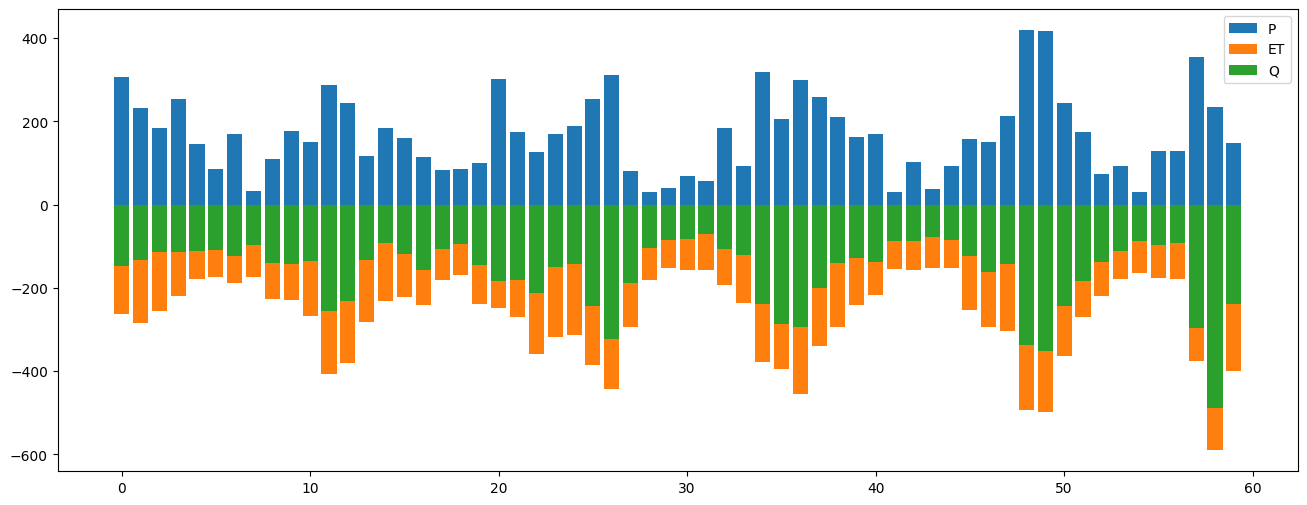

In [10]:
plt.figure(figsize=(16,6))
plt.bar(eixo_x,df_mensal['prec(mm/dia)'], label='P')
plt.bar(eixo_x,(-1)*df_mensal['et(mm/dia)'], bottom = (-1)*df_mensal['q(mm/dia)'],label='ET')
plt.bar(eixo_x,(-1)*df_mensal['q(mm/dia)'], label='Q')
plt.legend()
plt.show()

In [11]:
df_mensal.to_csv('dados_mensais_cambara_2004-2008.csv')

# Verificando o balanço hídrico

### Curvas dupla massa acumulada

* Entradas $\rightarrow$ Eixo x: Precipitação
* Saídas $\rightarrow$ Eixo y: Evapotranspiração e Vazão





In [13]:
# Acumular os dados
acumulado = df.cumsum() # cumulative sum
acumulado

,prec(mm/dia),etp(mm/dia),et(mm/dia),q(m3/s),q(mm/dia)
data,,,,,
2004-01-01,0.0000,3.954348,2.996060,0.76,5.051077
2004-01-02,0.0000,7.908696,5.992120,1.30,8.640000
2004-01-03,0.0000,11.863043,8.988179,1.81,12.029538
2004-01-04,0.0000,15.817391,11.984239,2.29,15.219692
2004-01-05,0.0000,19.771739,14.980299,2.90,19.273846
...,...,...,...,...,...
2008-12-27,10137.7350,8781.398189,6443.737319,1463.79,9728.573538
2008-12-28,10137.7350,8789.570653,6449.756522,1464.43,9732.827077
2008-12-29,10137.7350,8797.743117,6455.775725,1465.07,9737.080615


In [14]:
# visualização do balanço hídrico em curvas dupla massa acumulada
entradas = acumulado['prec(mm/dia)']
saidas = acumulado['q(mm/dia)'] + acumulado['et(mm/dia)']

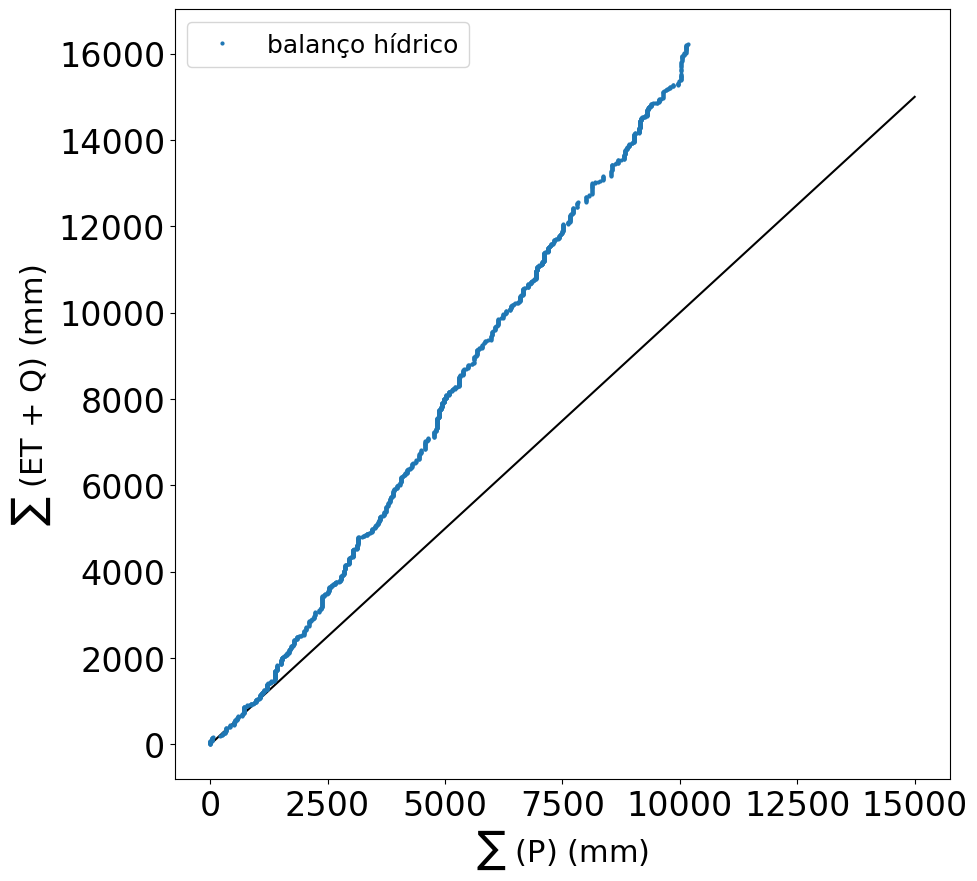

In [19]:
plt.figure(figsize=(10,10))
z = np.array([0,15000])
plt.plot(z,z,color='black')
plt.plot(entradas,saidas,'o',markersize=2,label='balanço hídrico')
plt.ylabel(r'$\sum$ (ET + Q) (mm)', fontsize=22) #y label
plt.xlabel(r'$\sum$ (P) (mm)', fontsize=22) #y label
plt.tick_params(axis='both', labelsize=24) #increase font size for ticks
leg = plt.legend(fontsize=18)
plt.show();